# maysics.algo模块使用说明

algo模块包含两个函数：

|名称|作用|
|---|---|
|pagerank|网页排序算法|
|pso|粒子群优化算法|

algo模块包含四个类：

|名称|作用|
|---|---|
|MC|蒙特卡洛模拟|
|GA|遗传算法|
|SA|模拟退火算法|
|GD|梯度下降算法|

<br></br>
## 网页排序算法：pagerank
pagerank(data, loop=5, pr=None, d=0.85, l=False)

用于网页重要性排序
<br>data：列表形式，每个连接所指向的链接或L矩阵，L矩阵即L(i, j)表示：如果j链接指向i链接，则L(i, j)为j链接指向的所有链接数；否则为0
<br>loop：整型，迭代次数，默认为5
<br>pr：一维数组形式，初始的pagerank值，默认pagerank值全部相等
<br>d：数类型，系数，默认为0.85
<br>l：布尔类型，True表示data是L矩阵，默认为False

### DEMO 1-1：计算如下链接指向图的各个链接的相对重要性

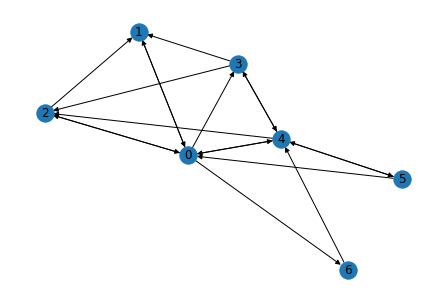

In [1]:
# 这里采用networkx包来对网络图进行绘制
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6])
G.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4), (0, 6),
                  (1, 0),
                  (2, 0), (2, 1),
                  (3, 1), (3, 2), (3, 4),
                  (4, 0), (4, 2), (4, 3), (4, 5),
                  (5, 0), (5, 4),
                  (6, 4)])
nx.draw(G, with_labels=True)
plt.show()

In [2]:
import maysics as ms

data = [[1, 2, 3, 4, 6],
        [0],
        [0, 1],
        [1, 2, 4],
        [0, 2, 3, 5],
        [0, 4],
        [4]]

ms.algo.pagerank(data, loop=10)

array([0.28032189, 0.15872033, 0.13889698, 0.10826608, 0.18410007,
       0.06060696, 0.06908769])

<br></br>
## 粒子群优化算法：pso
pso(select, initial, num=10, loop=10, omega=1, phi_1=2, phi_2=2, v_max=None, param={}, random_state=None, batch=True)
<br>```select```是粒子的评估函数，需返回每个粒子的评估值，默认函数最小值为最优
<br>```initial```是1维或2维数组，初始粒子位置 
<br>```num```是模拟粒子个数
<br>```loop```是迭代次数
<br>```omega```是数或函数，惯性权重因子，若为函数，其输入须为迭代次数
<br>```phi_1```是第一个加速度常数
<br>```phi_2```是第二个加速度常数
<br>```v_max```是粒子最大速度
<br>```param```：当select函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典
<br>```random_state```是随机种子
<br>```batch```：True表示评估函数为批量输入函数，False表示评估函数为非批量输入函数

### 第i个粒子的第k+1步迭代公式
$$v_{k+1}=\omega_{k}v_{k}+\phi_{1}rand(0,1)(p_{i,k}-x_{i,k})+\phi_{2}rand(0,1)(p_{g,k}-x_{i,k})$$
$$x_{k+1}=x_{k}+v_{k+1}$$
其中，$p_{i,k}$是第i个粒子k步扩散以来最优的位置
<br>$p_{g,k}$是所有粒子k步扩散以来最优的位置
<br>$rand$是随机函数

### DEMO 2-1：求非批量输入函数$f(x,y,z)=x^{2}+y^{2}+z^{2}$的最小值

In [3]:
import maysics as ms

def f(x):
    return sum(x**2)

#设置粒子初始位置为(5, 10, 10)
ms.algo.pso(f, [5, 10, 10], num=5, loop=300, v_max=10, random_state=100, batch=False)

array([ 3.79862362,  0.74240201, -2.43763427])

### DEMO 2-2：求批量输入函数$f(x,y,z)=x^{2}+y^{2}+z^{2}$的最小值

In [4]:
import maysics as ms

def f(x):
    x = x**2
    return x.sum(axis=1)

#设置粒子初始位置为(5, 10, 10)
ms.algo.pso(f, [5, 10, 10], num=5, loop=300, v_max=10, random_state=100)

array([ 3.79862362,  0.74240201, -2.43763427])

<br></br>
## 蒙特卡洛模拟：MC
MC(loop=1000, random_type='random', random_state=None, begin=None, end=None, n_jobs=1)

### MC下设四个可调用函数
```sel_ind```、```sel_any```、```sel_con```、```fit```
<br>其中，```fit```函数是核心函数，用于启动模拟

### 读取模拟结果
MC类有三个用于读取模拟结果的属性：```EX```、```DX```和```history```
<br>要在使用```fit```方法后，这三个属性才能调用
<br>```EX```表示最后一次使用```fit```方法的期望
<br>```DX```表示最后一次使用```fit```方法的方差
<br>```history```表示```EX```和```DX```的所有历史值
<br>```history```数据类型为字典，具体形式：```{'EX':[...], 'DX':[...]}```

### fit函数模拟原理
fit(length, dim, select)
<br>产生loop个length * dim的二维数组
<br>每一行称为一个状态，所以一个二维数组有length个状态
<br>一个length * dim的二维数组称为一个实验
<br>综上所述，MC的模拟结构是进行loop次模拟，每次模拟包括length个具有dim个元素的随机状态

```select```参数影响着模拟结果的生成，该参数可以是函数，也可以是函数列表
<br>无论是函数还是函数列表，都是由使用者自定义的
<br>```select```函数针对的对象一次模拟中的二维数组，即判断某一次模拟的结果如何
<br>对于输入函数的情况，```select```函数的返回值可以是任意值
<br>但是对于输入函数列表的情况，列表中各个函数的返回值只能是1或0

在每一次模拟后，由```select```函数返回的值会被计算机储存
<br>在```fit```方法进行loop次模拟后，会自动计算这些返回值的数学期望和方差
<br>数学期望和方差分别被储存在```EX```属性和```DX```属性中

### DEMO 3-1：select为函数

In [5]:
# 模拟抛硬币的过程，求硬币面的期望（正面表示1，反面表示0）
from maysics.algo import MC

# 返回硬币面代表的值
def select(x):
    return x[0][0]

# 产生随机数的方式是在[0, 1]内随机生成整数
mc = MC(random_type='randint', begin=0, end=1, random_state=100)

# 一次模拟就是抛一次硬币，只有一个状态和一个维度
# 所以length=1，dim=1
mc.fit(1, 1, select)

# 输出期望和方差
print('期望：{}\n方差：{}'.format(mc.EX, mc.DX))

期望：0.504
方差：0.24998400000000004


### DEMO 3-2：select为函数列表

In [6]:
# 用1/4圆和外接正方形面积比的方法逼近pi
# 产生二维随机数(x, y)，在圆内的点数目/全部点数目 ≈ pi/4
from maysics.algo import MC

# 在半径为1的1/4圆内的点输出1，否则输出0
def select(x):
    if x[0][0]**2 + x[0][1]**2 < 1:
        return 1
    else:
        return 0

# 默认loop=1000，产生[0, 1)之间的随机数
mc = MC(random_state=100)

# 一次模拟为一个状态，两个维度
# 所以length=1，dim=2
mc.fit(1, 2, select)

print('pi/4 ≈ {}\n方差：{}'.format(mc.EX, mc.DX))

pi/4 ≈ 0.814
方差：0.15140400000000004


### sel_ind、sel_any和sel_con
这三个函数用于辅助编写```select```函数
<br>三个函数都有```condition```参数，该参数要求输入一个由使用者编写的函数
<br>```condition```函数类似只针对一个状态来编写的```select```函数
<br>但是```condition```函数并不如自定义的```select```函数一样可以返回各种值
<br>而是只能返回True或False，来判断某个函数是否“适格”

若某个```condtion```函数表示一个状态的所有维度之和大于10为True，否则为False
<br>则```sel_ind```函数可以编写一个```select```函数：一次模拟只有每个状态的维度之和大于0才会返回1，否则返回0
<br>```sel_any```函数可以编写一个```select```函数：一次模拟只要任意n个状态的维度之和大于0就会返回1，否则返回0
<br>```sel_con```函数可以编写一个```select```函数：一次模拟要有n个连续的状态维度之和大于0才会返回1，否则返回0
<br>具体例子如下：
### DEMO 3-3：求一个月内连续两周下雨大于等于3天的概率

In [7]:
# 已知下个月降雨率为40%
# 求一个月内连续两周下雨大于等于3天的概率
# 一次模拟是一个月的天气情况，一个月设有四周
# 则一次模拟应为4个状态，7个维度
# 即length=4，dim=7
from maysics.algo import MC

# 针对一个状态编写condition函数
# 根据降雨概率
# 随机数大于0.4表示晴天，小于等于0.4表示雨天
def condition(x):
    num = len(x[x <= 0.4])
    if num >= 3:
        return True
    else:
        return False

mc = MC(random_state=100)

# 通过sel_con函数生成select函数
select = mc.sel_con(3, condition)
mc.fit(4, 7, select)

print('概率：{}\n方差：{}'.format(mc.EX, mc.DX))

概率：0.268
方差：0.196176


### 使用自定义随机数产生方法
可以在类的实例化时，修改```random_type```参数，输入自定义的随机数产生方式
### DEMO 3-4：求自由度为2的卡方分布均值和方差

In [8]:
from maysics.algo import MC
import numpy as np

def select(x):
    return x[0][0]


def random_f():
    return np.array([[np.random.chisquare(2)]])

# 将模拟次数调整到10000次
mc = MC(loop=10000, random_type=random_f, random_state=100)
mc.fit(length=None, dim=None, select=select)

print('均值：{}\n方差：{}'.format(mc.EX, mc.DX))

均值：1.99383007531525
方差：4.050676069065209


### 多核计算
在类的实例化时，可以修改```n_jobs```参数，表示调用的cpu数，默认为1
<br>当设定```n_jobs=-1```时，则会调用所有的cpu进行计算
#### 注意
在设定```n_jobs```不为1时，要加上```if __name__ == "__main__":```才会起效果
<br>多核运行时需要在.py文件中运行才会起效果

<br></br>
## 遗传算法：GA
GA(population=1000, iteration=100, random_type='random', select='rw', crossover='uniform', begin=None, end=None, random_state=None, select_rate=0.3, mutate_rate=0.05, crossover_rate=0.5, repeat=True)

GA类下仅设一个可调用函数```fit```
<br>fit(length, fitness, param={})
<br>```length```是染色体长度
<br>```fitness```是适应度函数
<br>```param```：当fitness函数有其他非默认参数时，需输入以参数名为键，参数值为值的字典


### 名词解释
个体：由一段长为length的染色体组成
<br>种群：population个个体组成
<br>交叉互换：两个个体之间部分染色体进行交换
<br>变异：染色体部分随机变化
<br>选择：通过一定的机制淘汰一部分个体，使得另一部分个体得以保留

### 模拟原理
随机生成种群 → 选择 → 交叉互换 → 变异 → 选择
<br>经过多次选择后得到优势个体则为问题最优解
<br>选择的标准是由使用者自定义的```fitness```函数
<br>```fitness```函数针对的对象是一个个体，返回值是个体的适应性的量化值
<br>对于有着更高“适应值”的个体，更有可能在环境中存活，即更有可能“被选择”
<br>相应地，对于“适应值”较低的个体，也有一定概率可以在“选择”中存活下来

#### 选择
选择有两种可选择方式：轮盘赌选择和随机竞争选择（默认为轮盘赌选择）
<br>轮盘赌选择：
<br>随机竞争选择：
<br>在种群中随机选择两个不同个体，比较他们的“适应值”，高的一方可以存活

#### 交叉互换
交叉互换有两种可选择方式：均匀交叉和多点交叉（默认为均匀交叉）
<br>均匀交叉：
<br>在种群中随机选择两个不同的个体，染色体的每个基因都有固定的概率会发生交换
<br>多点交叉：
<br>在种群中随机选择两个不同的个体，染色体随机的n歌基因会发生交换

#### 变异
种群中的每个个体在交叉互换后
<br>染色体的每个基因都有固定的概率（默认为0.05）发生变化（变成一个随机生成的基因）

### 适应度函数
fitness函数的输入是一个一维ndarray

### 查看模拟结果
GA类有两个可以读取模拟结果的属性：```dom```和```dom_fitness```
<br>分别可以读取最后选择的优势种和优势种中各个个体的“适应值”

### DEMO 4-1：求$f(x, y) = (x - 0.5)^{2} + (y - 0.5)^{2}$在$x\in[0, 1)，y\in[0, 1)$的最小值

In [9]:
from maysics.algo import GA
import numpy as np

# 将函数值+1的倒数作为“适应值”
def fitness(x):
    y = (x[0] - 0.5)**2 + (x[1] - 0.5)**2
    return 1 / (y + 1)

# 将存活率调整至3%
ga = GA(select_rate=0.03, random_state=100)

# 设定染色体长度为2（只有两个基因：x和y）
ga.fit(2, fitness)
y = 1 / ga.dom_fitness - 1

print('优势种：{}\n函数值：{}'.format(ga.dom, y))

# 在优势种中找到最优个体
index = np.argmin(y)
print('\n最优个体：{}\n相应函数值：{}'.format(ga.dom[index], y[index]))

优势种：[[0.97204827 0.16734239]
 [0.52863842 0.30842538]
 [0.68144675 0.55333747]
 [0.3918928  0.54980302]
 [0.11736584 0.5591965 ]
 [0.4228853  0.27077977]
 [0.17357838 0.27077977]
 [0.04606048 0.07130865]
 [0.68144675 0.40957457]
 [0.9689087  0.0015164 ]
 [0.84159852 0.16157609]
 [0.54190479 0.56029817]
 [0.4228853  0.3734573 ]
 [0.74305167 0.54980302]
 [0.32302048 0.5178659 ]
 [0.04606048 0.82930784]
 [0.48871746 0.16157609]
 [0.4228853  0.20302696]
 [0.46687011 0.46853831]
 [0.48898286 0.5178659 ]
 [0.54190479 0.11109486]
 [0.48871746 0.93469173]
 [0.4228853  0.73814262]
 [0.9689087  0.55333747]
 [0.56495697 0.11109486]
 [0.11736584 0.55333747]
 [0.48898286 0.79166162]
 [0.69652605 0.91991898]
 [0.4228853  0.11115012]
 [0.69652605 0.55333747]]
函数值：[3.33490654e-01 3.75209936e-02 3.57678082e-02 1.41675069e-02
 1.49913127e-01 5.84885895e-02 1.59092989e-01 3.89837360e-01
 4.10996811e-02 4.68361269e-01 2.31220293e-01 5.39188149e-03
 2.19597324e-02 6.15544570e-02 3.16409419e-02 3.14504739e-

染色体的基因可以是整数也可以是小数，在初始化GA时可以通过```random_type```参数调整
<br>```random_type='random'```表示基因由在0到1之间的随机小数构成
<br>```random_type='randint'```表示基因由随机整数构成
<br>在后者的情况中，初始化时还有两个参数会起作用：```begin```和```end```
<br>表示随机整数的范围

### DEMO 4-2：使用随机整数为基因的遗传算法

In [10]:
from maysics.algo import GA
import numpy as np

# 求f(x, y) = (x - 5)^2 + (y - 5)^2
# 在x∈[0, 10]，y∈[0, 10]且x，y均为整数的最小值

# 将函数值+1的倒数作为“适应值”
def fitness(x):
    y = (x[0] - 5)**2 + (x[1] - 5)**2
    return 1 / (y + 1)

# 将种群数调整为30，迭代次数调整为15次
ga = GA(30, 15, random_type='randint', begin=0, end=10, random_state=100)

# 设定染色体长度为2（只有两个基因：x和y）
ga.fit(2, fitness)
y = 1 / ga.dom_fitness - 1

print('优势种：{}\n函数值：{}'.format(ga.dom, y))

# 在优势种中找到最优个体
index = np.argmin(y)
print('\n最优个体：{}\n相应函数值：{}'.format(ga.dom[index], y[index]))

优势种：[[ 4  5]
 [ 5  5]
 [ 3  4]
 [ 5  4]
 [ 6  3]
 [10  2]
 [ 3  0]
 [ 9  5]
 [ 3  9]]
函数值：[ 1.  0.  5.  1.  5. 34. 29. 16. 20.]

最优个体：[5 5]
相应函数值：0.0


在```random_type='randint'```时还可以调整参数```repeat```
<br>作用是是否允许个体的基因重复
<br>```repeat```参数默认为True，即允许基因重复

### DEMO 4-3：旅行商（TSP）问题

In [11]:
# 求解邻接矩阵如a的图的TSP问题
from maysics.algo import GA
import numpy as np

# 邻接矩阵
a = [[0, 1, 3, 3, 5, 2],
     [1, 0, 4, 2, 2, 3],
     [3, 4, 0, 2, 4, 7],
     [3, 2, 2, 0, 3, 6],
     [3, 2, 4, 3, 0, 9],
     [2, 3, 7, 6, 9, 0]]

def fitness(x):
    result = 0
    for i in range(len(x)-1):
        result += a[x[i]][x[i+1]]
    result += a[x[-1]][x[0]]
    return 1 / result

# 调整repeat=False
ga = GA(population=50, iteration=30, random_type='randint', begin=0, end=5, repeat=False, random_state=100)

ga.fit(6, fitness)

print('较短路径：{}\n路程长度：{}'.format(ga.dom, 1 / ga.dom_fitness))

较短路径：[[3 0 2 4 5 1]
 [0 2 5 4 3 1]
 [2 5 3 0 1 4]
 [1 0 4 5 3 2]
 [1 5 4 0 2 3]
 [2 3 4 0 1 5]
 [0 3 4 1 2 5]
 [3 5 4 0 2 1]
 [0 4 1 2 3 5]
 [1 4 0 3 2 5]
 [4 3 5 1 2 0]
 [5 4 0 2 1 3]
 [5 0 2 3 1 4]
 [0 2 3 4 5 1]
 [0 3 2 4 1 5]]
路程长度：[24. 25. 23. 27. 22. 19. 21. 27. 21. 20. 24. 27. 20. 21. 16.]


<br></br>
## 模拟退火算法：SA
SA(anneal=0.9, step=1, param={}, n=10, random_state=None)

### 等温过程
从初始点$x$开始，随机生成一个位移$\Delta x$，判断x点和$x+\Delta x$点的函数值大小
<br>如果$f(x+\Delta x)<f(x)$，则用$x+\Delta x$取代$x$
<br>如果$f(x+\Delta x)>=f(x)$，则有$e^{-\Delta f/T}$的概率用$x+\Delta x$取代$x$
<br>其中，$df=f(x+\Delta x)-f(x)$，$T$为当前温度
<br>该过程迭代n次

### 退火过程
温度$T$按照设定的退火模式降低，默认为$T_{new}=0.9T$
<br>退火后重新进入等温过程，直至温度$T$降低到设定的退火温度$T_{0}$

<br>注意：默认最小值点为最优点
### DEMO 5-1：求函数$f(x, y) = (x - 1)^{2} + (y - 1)^{2}$的最小值

In [12]:
from maysics.algo import SA

# 定义被优化函数
def select(x):
    return (x[0]-1)**2 + (x[1]-1)**2


sa = SA(random_state=100)
# 设定初始点为(2, 2)
# 设定初始温度为100，退火温度为20
sa.fit(select, 100, 20, [2, 2])

print('最小值点：{}\n最小值：{}'.format(sa.solution, sa.value))

最小值点：[-0.56947081  2.63078061]
最小值：5.122684020493003


### DEMO 5-2：求函数$f(x, y) = (x - 1)^{2} + (y - 1)^{2}$的最小值时的退火轨迹

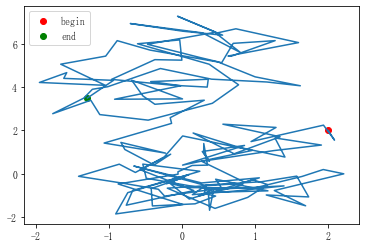

In [13]:
from maysics.algo import SA
from matplotlib import pyplot as plt

# 定义被优化函数
def select(x):
    return (x[0]-1)**2 + (x[1]-1)**2


sa = SA(random_state=100)
# 设定初始点为(2, 2)
# 设定初始温度为100，退火温度为20
sa.fit(select, 100, 20, [2, 2])

plt.plot(sa.trace[:, 0], sa.trace[:, 1])
plt.scatter(sa.trace[0,0], sa.trace[0,1], color='red', label='begin')
plt.scatter(sa.trace[-1,0], sa.trace[-1,1], color='green', label='end')
plt.legend()

### DEMO 5-3：旅行商（TSP）问题

In [14]:
from maysics.algo import SA
import numpy as np

a = [[0, 1, 3, 3, 5, 2],
     [1, 0, 4, 2, 2, 3],
     [3, 4, 0, 2, 4, 7],
     [3, 2, 2, 0, 3, 6],
     [3, 2, 4, 3, 0, 9],
     [2, 3, 7, 6, 9, 0]]

def f(x):
    y = np.random.randint(1, len(x)-1, size=(2))
    x[y[0]], x[y[1]] = x[y[1]], x[y[0]]
    return x

def select(x):
    result = 0
    for i in range(len(x)-1):
        result += a[int(x[i])][int(x[i+1])]
    result += a[int(x[-1])][int(x[0])]
    return result

sa = SA(step=f, random_state=100)
sa.fit(select, 1000, 300, [0, 1, 2, 3, 4, 5])
print('最优路径：{}\n最优路径长度：{}'.format(sa.solution, sa.value))

最优路径：[0. 1. 3. 2. 4. 5.]
最优路径长度：20


在实际使用过程中，由于模拟退火有一定的随机算法，因此除非定义random_state，否则每次计算结果都可能不同
<br>可以使用fit函数中的loop参数来进行多次模拟退火，选取其中的最优解

### DEMO 5-4：用循环模拟退火求解旅行商（TSP）问题

In [15]:
from maysics.algo import SA
import numpy as np

a = [[0, 1, 3, 3, 5, 2],
     [1, 0, 4, 2, 2, 3],
     [3, 4, 0, 2, 4, 7],
     [3, 2, 2, 0, 3, 6],
     [3, 2, 4, 3, 0, 9],
     [2, 3, 7, 6, 9, 0]]

def f(x):
    y = np.random.randint(1, len(x)-1, size=(2))
    x[y[0]], x[y[1]] = x[y[1]], x[y[0]]
    return x

def select(x):
    result = 0
    for i in range(len(x)-1):
        result += a[int(x[i])][int(x[i+1])]
    result += a[int(x[-1])][int(x[0])]
    return result

sa = SA(step=f, random_state=100)
sa.fit(select, 1000, 300, [0, 1, 2, 3, 4, 5], loop=100)
print('最优路径：{}\n最优路径长度：{}'.format(sa.solution, sa.value))

最优路径：[0. 1. 4. 3. 2. 5.]
最优路径长度：15


当select函数有其他参数时，可以使用fit函数的args参数来传递

<br></br>
## 梯度下降算法：GD
GD(ytol=0.01, step=0.1, acc=0.1)

GD类下设```fit```方法
<br>fit(select, initial, param={})
<br>```select```是评估函数
<br>```initial```是初始解，select函数的输入值
<br>```param```：当select有其他非默认参数时，需输入以参数名为键，参数值为值的字典

<br>用法类似SA
<br>注意：默认最小值点为最优点
### DEMO 6-1：求函数$f(x, y) = (x - 1)^{2} + (y - 1)^{2}$的最小值

In [16]:
from maysics.algo import GD

# 定义被优化函数
def select(x):
    return (x[0]-1)**2 + (x[1]-1)**2


gd = GD()
# 设定初始点为(10, 10)
# 设定初始温度为100，退火温度为20
gd.fit(select, [10, 10])

print('最小值点：{}\n最小值：{}'.format(gd.solution, gd.value))

最小值点：[1.08301035 1.08301035]
最小值：0.01378143586029789


### DEMO 6-2：求函数$f(x, y) = (x - 1)^{2} + (y - 1)^{2}$的最小值求解轨迹

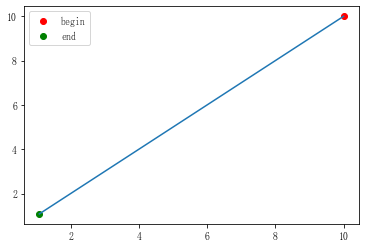

In [17]:
from maysics.algo import GD
from matplotlib import pyplot as plt

# 定义被优化函数
def select(x):
    return (x[0]-1)**2 + (x[1]-1)**2


gd = GD()
# 设定初始点为(10, 10)
# 设定初始温度为100，退火温度为20
gd.fit(select, [10, 10])

plt.plot(gd.trace[:, 0], gd.trace[:, 1])
plt.scatter(gd.trace[0,0], gd.trace[0,1], color='red', label='begin')
plt.scatter(gd.trace[-1,0], gd.trace[-1,1], color='green', label='end')
plt.legend()

当select函数有其他参数时，可以使用fit函数的args参数来传递